<a href="https://colab.research.google.com/github/gabriel-afd/Simulacao_OpenCIV/blob/main/Simulacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openpiv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 5.7 MB/s eta 0:00:00
  Attempting uninstall: importlib_resources
    Found existing installation: importlib_resources 6.5.2
    Uninstalling importlib_resources-6.5.2:
      Successfully uninstalled importlib_resources-6.5.2


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from openpiv import pyprocess, piv

In [11]:
#Leitura do Vídeo

vidcap = cv2.VideoCapture('waves.mp4')

sucesso, image1 = vidcap.read()
cont = 0
U = []
V = []

while sucesso:
  sucesso, image2 = vidcap.read()
  if sucesso:
    x,y,u,v,s2n = piv.simple_piv(image1.sum(axis=2), image2.sum(axis=2), plot=False)
    image1 = image2.copy()
    cont +=1
    U.append(u)
    V.append(v)



In [12]:
#Cálculo da Velocidade Média

U = np.stack(U)
Umean = np.nanmean(U, axis = 0)
V = np.stack(V)
Vmean = np.nanmean(V, axis = 0)

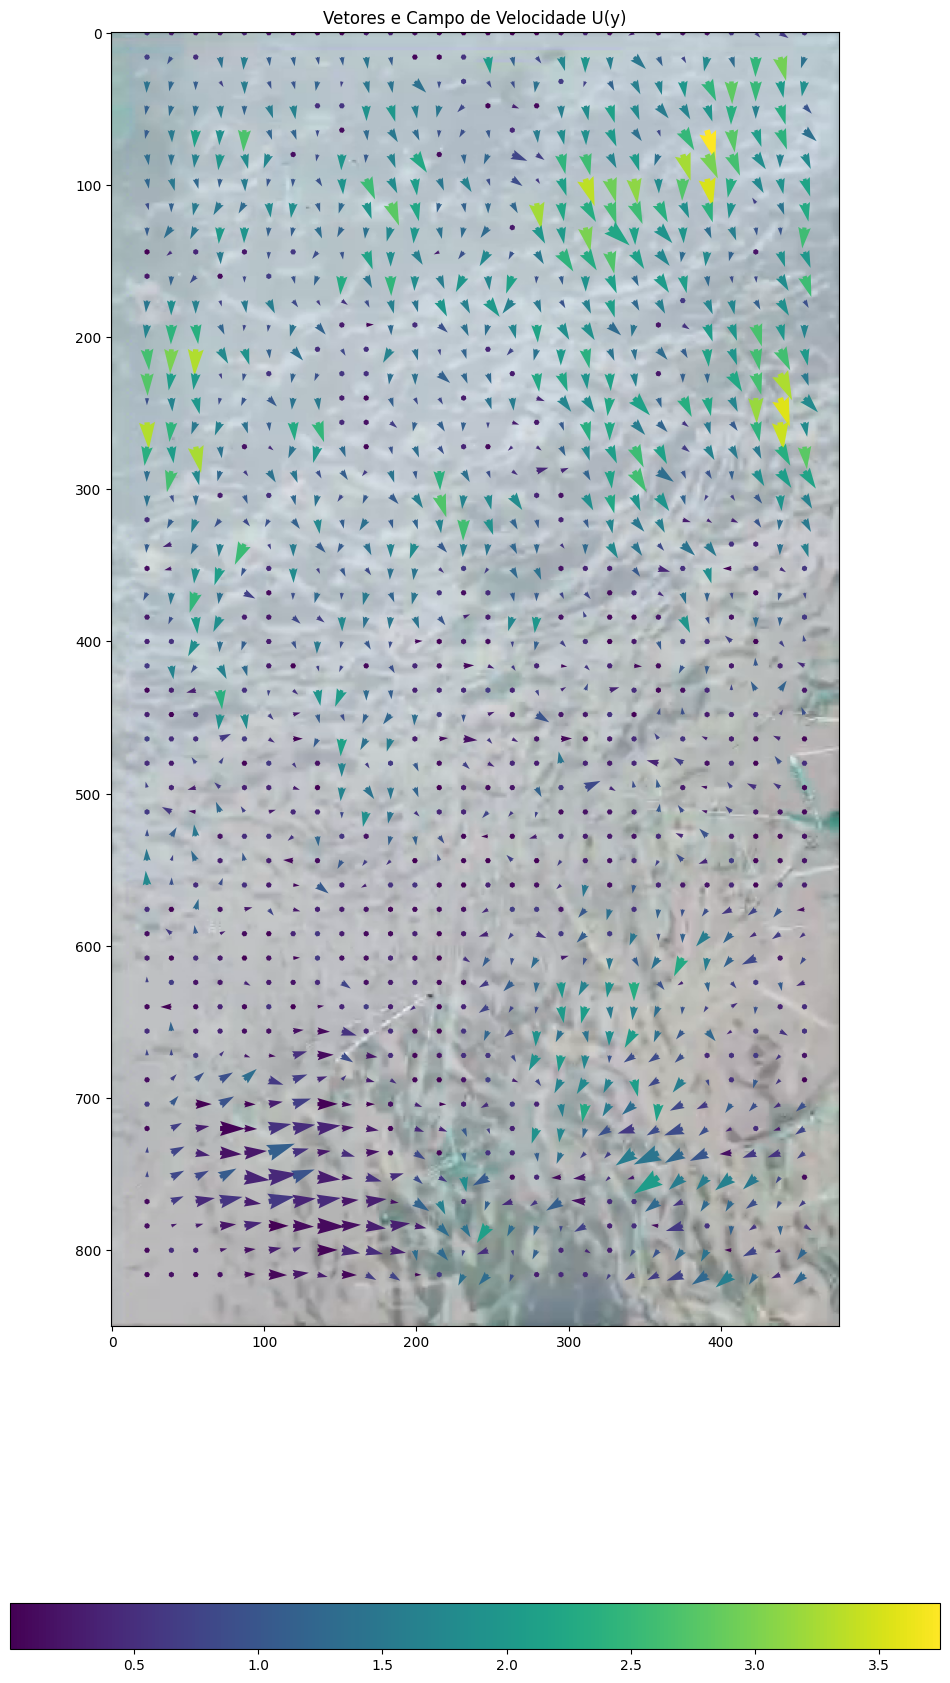

In [13]:
#Visualização do Campo de Velocidades

fig, ax=plt.subplots(figsize=(12,24))
ax.imshow(image1, cmap='gray')
cm = ax.quiver(x, y.max()-y, Umean, Vmean, np.abs(Vmean), scale=90, width=.008)
plt.title('Vetores e Campo de Velocidade U(y)')
plt.colorbar(cm, orientation='horizontal')